In [1]:
using 
    Random, Distributions, StatsPlots, Printf,
    BenchmarkTools, ForwardDiff, Optim

# warning need to using StatsPlots if plot(`distribution`)

# Homework on Accept-Reject Sampling

Suppose $X$ is a random variable that follows a half-normal distribution $N^+(0,2)$. Write an accept-reject program that uses the exponential distribution $Exp(2)$ as the proposal distribution to draw samples from $X$. The challenge is to find the value of `m`. 

Let Y denote the random variable generated by the accept-reject method. 
f(x) is the target distribution, g(x) is the proposed distribution. 

#### \<proof\>
WTS $P(Y<y) = \int_{-\infty}^y f(x) dx$

\begin{eqnarray*}
Pr(Y \le y) 
&=& Pr(X \le y | U \le \frac{f(x)}{mg(x)}) \\
&=& \frac{Pr(X \le y, U \le \frac{f(x)}{mg(x)})}{Pr(U \le \frac{f(x)}{mg(x)})} \\
&=& \frac{\int_{-\infty}^y \int_0^{\frac{f(x)}{mg(x)}}g(x)dudx}{\int_{-\infty}^\infty \int_0^{\frac{f(x)}{mg(x)}}g(x)dudx} \\
&=& \frac{\int_{-\infty}^y (\frac{f(x)}{mg(x)}) g(x)dudx}{\int_{-\infty}^\infty (\frac{f(x)}{mg(x)})g(x)dudx} \\
&=& \int_{-\infty}^y f(x) dx
\end{eqnarray*}



## Draw the density plots of $X$ and $Exp(2)$ to visually inspect the distributions. What is the range in the values of $X$ that `m` is most likely to occur?

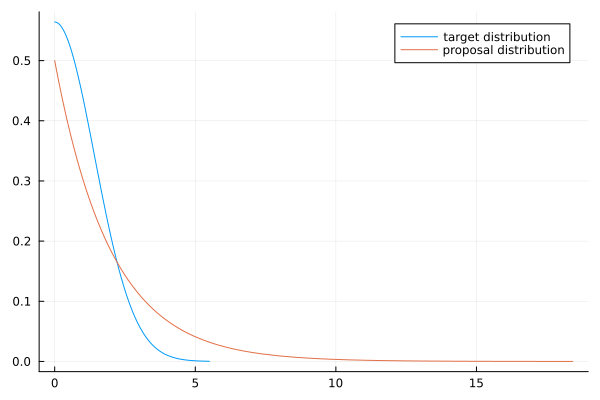

In [2]:
target_dist = Truncated(Normal(0, sqrt(2)), 0, Inf)
proposal_dist = Exponential(2)

plot(target_dist, label="target distribution")
plot!(proposal_dist, label="proposal distribution")

In [3]:
# 張暐翔

halfNormal = Truncated(Normal(0, 2), 0, Inf)
Exp = Exponential(2)

new_x = range(0, stop = 15, length = 100000)
targetPDF = pdf.(halfNormal, new_x)
proposalPDF = pdf.(Exp, new_x)

println("從下圖可以看到，大致上在[0.45, 3.5]這個區間，targetPDF是比proposalPDF還高的，因此m會出現大於1的值")

maxM = 0
for i in 1:100000
    if (targetPDF[i]/proposalPDF[i]) > maxM
        maxM = (targetPDF[i]/proposalPDF[i])
    end
end


println("用迴圈迭代的方式，可得到最大的m值為：",maxM)

adjust_proposalPDF = maxM.*proposalPDF

plot(new_x, proposalPDF, label = "oldProposal")
plot!(new_x, targetPDF, label = "target")
plot!(new_x, adjust_proposalPDF, label = "newProposal")

從下圖可以看到，大致上在[0.45, 3.5]這個區間，targetPDF是比proposalPDF還高的，因此m會出現大於1的值
用迴圈迭代的方式，可得到最大的m值為：1.3154892468109185


## Write a program that calculates `m`. 
Hint: An _exact_ solution may be difficult and so an approximated value is enough. 

 m occurs at x*=1.0 and m(x*)=1.4488675302


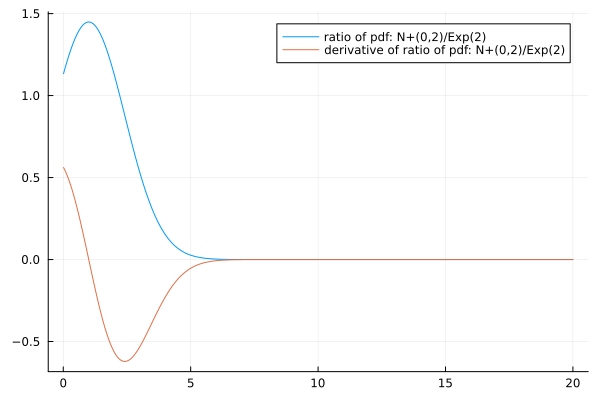

In [4]:
#申大昀
using  MTH229, Roots, Printf

function ratio(x)
    pdf(truncated(Normal(0, sqrt(2)), 0, Inf),x) / pdf(Exponential(2),x)
end

x_star = find_zero(ratio', (0.01, 2.5))  # ratio': derivative of ratio(x). Need the package "MTH229".
m = ratio(x_star)

@printf(" m occurs at x*=%.1f and m(x*)=%.10f\n", x_star, m)
# Based on the graph below, "m", for which derivative of the retio equals zero, seems to occur within (0.01,2.5). This is same as what we expected above.


plot(ratio, 0.01, 20, label="ratio of pdf: N+(0,2)/Exp(2)")
plot!(ratio', 0.01, 20, label="derivative of ratio of pdf: N+(0,2)/Exp(2)")

In [5]:
#傅學恩

#check where m occurs and calculate m
#using Pkg;Pkg.add("Optim")

X = Truncated(Normal(0, sqrt(2)), 0, Inf)
prop = Exponential(2)

using Optim
f(x) = -pdf(X,x)/pdf(prop,x)
result = optimize(f, 0, 5) 
max_val = -result.minimum
argmax_val = result.minimizer
println("Maximum value: ", max_val)
println("m happens at: ", argmax_val)
m=max_val
@show m

# note: should optimize -f instead of f
# default numeric optimization method: Brent

Maximum value: 1.4488675302115823
m happens at: 1.0000000151667292
m = 1.4488675302115823


1.4488675302115823

### Grid search

m is most likely occur in [0, 2.217837817831661]


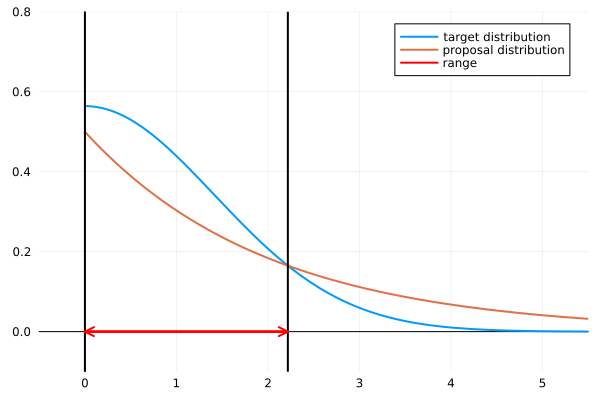

In [6]:
#徐晨祐

using Distributions, LaTeXStrings, StatsPlots, Roots

target_distribution = truncated(Normal(0, sqrt(2)); lower=0)
proposal_distribution = Exponential(2)

f(x) = pdf(target_distribution, x) - pdf(proposal_distribution, x)
root = find_zero(f, (0, 3))
println("m is most likely occur in [0, $root]")
    
plot(target_distribution, xlim=[-0.5, 5.5], ylim=[-0.1, 0.8], linewidth=2, label="target distribution", framestyle=:zerolines)
plot!(proposal_distribution, linewidth=2, label="proposal distribution")
vline!([0, root], color=:black, label="", linewidth=2)
plot!([0, root], [0, 0], arrow=true, color=:red, linewidth=2, label="range")
plot!([root, 0], [0, 0], arrow=true, color=:red, linewidth=2, label="")

In [7]:
pdf_target_dist = x->pdf(target_dist, x)
f = x -> pdf_target_dist(x) / pdf(proposal_dist, x)

# warning (wrong)
#f =  x -> abs(pdf_target_dist(x) - pdf(proposal_dist, x))

function findm(l, u , step)
    m, _ = findmax(f, l:step:u)
    
    # 曾政夫
    # idx = argmax(f, l:step:u); m = f(idx)
    
    # 魏上傑
    # m = maximum([f(x) for x in 0:0.01:10])
    
    # 尚浩嶽
    # m = 0
    # for i in l:step:u
    #     r = f(i) 
    #     r > m && (m = r)
    # end
    
    # 徐晨祐
    # m = 0
    # for x in range(start=0, stop=round(root, digits=3), length=10000)
    #     m = max(f(x), m) 
    # end
    
    return m
end

m = findm(0, 5, 1e-3)

LoadError: invalid redefinition of constant f

In [8]:
#郭道沅

# use pdf function to get values from X and Exp2
# divide the two and look for the Maxima (m)

X = Truncated(Normal(0, sqrt(2)), 0, Inf)
Exp2 = Exponential(2)

x = 0                         # this is x-axis, not X
m = 0
while x < 20
    y1 = pdf(X, x)
    ydelta = pdf(Exp2, x)
    x += 0.1                  # the size of each tick is adjustable, the smaller the more accurate
    
    if y1/ydelta > m
        m = y1/ydelta
    end
    
    println(x - 0.1, " ,", m)
    
    if y1/ydelta < 1
        break
    end
end
m = round(m, digits = 2)    # approximate to two digits

# note: good algorithum when we know the obj function is concave

0.0 ,1.1283791670955126
0.1 ,1.183270526999109
0.20000000000000004 ,1.2346434669046147
0.30000000000000004 ,1.281821659459068
0.4 ,1.3241652191872681
0.5 ,1.3610850841670585
0.6 ,1.392056621757998
0.7 ,1.4166320201936282
0.7999999999999999 ,1.4344510574105445
0.8999999999999999 ,1.4452498853263498
0.9999999999999999 ,1.4488675302115825
1.0999999999999999 ,1.4488675302115825
1.2 ,1.4488675302115825
1.3 ,1.4488675302115825
1.4000000000000001 ,1.4488675302115825
1.5000000000000002 ,1.4488675302115825
1.6000000000000003 ,1.4488675302115825
1.7000000000000004 ,1.4488675302115825
1.8000000000000005 ,1.4488675302115825
1.9000000000000004 ,1.4488675302115825
2.0000000000000004 ,1.4488675302115825
2.1000000000000005 ,1.4488675302115825
2.2000000000000006 ,1.4488675302115825
2.3000000000000007 ,1.4488675302115825


1.45

In [9]:
# adaptive grid search

# change the function to difficult problem
g(x) = pdf(truncated(Normal(0, sqrt(3.5)), 0, Inf),x) / pdf(Exponential(2.7),x)

# set grid and initial value
grid = collect(range(0, 5, length = 11))
int_length = 1

diff = 100
tor_error = 1e-8

m = 0
NR = 0
while diff > tor_error
    (max, max_index) = findmax(g, grid)
    deleteat!(grid, max_index)
    (sec, sec_index) = findmax(g, grid)
    
    diff = max-sec
    
    m = max
    int_length = int_length/2
    grid = collect(range(m - int_length, m + int_length, length = 11))
    
    NR += 1 
    NR % 10 == 0 && @info ("NR = $NR, diff = $diff")
end

@show m
result = optimize(x -> -g(x), 0, 2.5)  # true answer

m = 1.4584545603441186


[ Info: NR = 10, diff = 2.6148385007251918e-5
[ Info: NR = 20, diff = 2.5776264234167456e-8


1.4584545603441186

## Write an accept-reject sampling program for $X$ and use it to draw a random sample of 100,000 values.

In [11]:
function sampling(pdf_target_dist::Function, proposal_dist, m, n)
    samples = zeros(n)
    i = 1
    
    while i <= n
        x = rand(proposal_dist)
        accept_rate = pdf_target_dist(x) / (m*pdf(proposal_dist, x))
        rand() <= accept_rate && (samples[i]=x; i+=1)
    end
    
    return samples
end


function sampling_push(pdf_target_dist::Function, proposal_dist, m, n)
    samples = []
    i = 1
    
    while i <= n
        x = rand(proposal_dist)
        accept_rate = pdf_target_dist(x) / (m*pdf(proposal_dist, x))
        rand() <= accept_rate && (push!(samples, x); i+=1)
    end
    
    return samples
end
;

In [16]:
@btime sampling(x->pdf(target_dist, x), proposal_dist, m, 100_000)

# avoid method: push!
@btime sampling_push(x->pdf(target_dist, x), proposal_dist, m, 100_000);

  17.814 ms (728887 allocations: 11.88 MiB)
  19.036 ms (829066 allocations: 14.48 MiB)


In [13]:
# pass by value, pass by reference

## Draw a histogram of the sample and overlay it with the theoretical density. Calculate the mean and the variance of the sample and compare them to the theoretical values. Are they close?

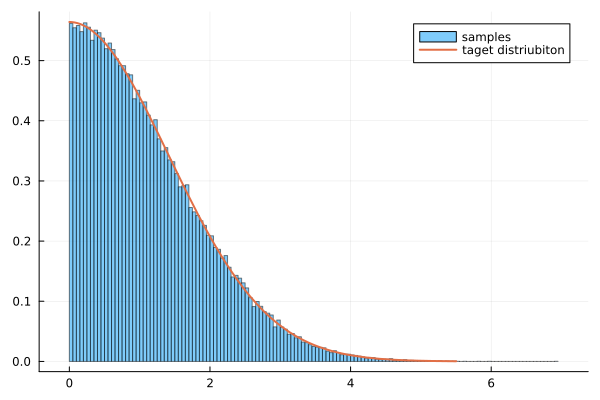

In [14]:
Random.seed!(1234)

samples = sampling(x->pdf(target_dist, x), proposal_dist, m, 100_000)

histogram(samples, alpha=0.5, normalize=true, label="samples")
plot!(target_dist, linewidth=2, label="taget distriubiton")

In [15]:
@printf("theoretical mean: %.5f\n", mean(target_dist))
@printf("theoretical variance: %.5f\n\n", var(target_dist))

@printf("sample mean: %.5f\n", mean(samples))
@printf("sample variance: %.5f", var(samples))

theoretical mean: 1.12838
theoretical variance: 0.72676

sample mean: 1.13005
sample variance: 0.72610